# *__Future Medical Data Analysis through Data Cleaning and Image Processing__*


# Data Cleaning and Analysis:

## Task 1: Merging of the two datasets

### 1. Importing the required libraries


In [798]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 2. Loading the data into the data frame.

In [799]:
# Load data
od1 = pd.read_excel('Datasets for Data Cleaning and Analysis/od1.xlsx')
od2 = pd.read_excel('Datasets for Data Cleaning and Analysis/od2.xlsx')
os = pd.read_excel('Datasets for Data Cleaning and Analysis/os.xlsx', header=[0, 1])

In [800]:
#Check how the columns are seperated
print(od1.columns)
print(od2.columns)
print(os.columns)

Index(['ID', 'Age', 'Gender', 'Diagnosis', 'dioptre_1', 'dioptre_2',
       'astigmatism', 'Pachymetry'],
      dtype='object')
Index(['Diagnosis', 'dioptre_1', 'dioptre_2', 'astigmatism',
       'Phakic/Pseudophakic', 'Pneumatic', 'Perkins', 'Pachymetry',
       'Axial_Length', 'VF_MD'],
      dtype='object')
MultiIndex([( 'Unnamed: 0_level_0',                  'ID'),
            (                'Age',                 'Age'),
            (             'Gender',              'Gender'),
            (          'Diagnosis',           'Diagnosis'),
            (  'Refractive_Defect',           'dioptre_1'),
            (  'Refractive_Defect',           'dioptre_2'),
            (  'Refractive_Defect',         'astigmatism'),
            ('Phakic/Pseudophakic', 'Phakic/Pseudophakic'),
            (                'IOP',           'Pneumatic'),
            (                'IOP',             'Perkins'),
            (         'Pachymetry',          'Pachymetry'),
            (       'Axial_L

### 3. Merging of data frames

In [801]:
# Finding Common columns
common_cols = np.intersect1d(od1.columns, od2.columns)
 
# Printing common columns
print ("Common Columns:",common_cols)

Common Columns: ['Diagnosis' 'Pachymetry' 'astigmatism' 'dioptre_1' 'dioptre_2']


Merge od1 and od2 on the common columns

In [802]:
merged_od = od1.merge(od2, on=['Diagnosis', 'dioptre_1', 'dioptre_2', 'astigmatism', 'Pachymetry'], how='outer')
merged_od.head()

,ID,Age,Gender,Diagnosis,dioptre_1,dioptre_2,astigmatism,Pachymetry,Phakic/Pseudophakic,Pneumatic,Perkins,Axial_Length,VF_MD
0,#038,34,female,healthy,0.50,-1.00,90.0,599.0,NaN,19.0,NaN,23.33,NaN
1,#280,60,male,healthy,-0.50,-1.00,23.0,577.0,the eye keeps the lens,19.0,NaN,25.06,NaN
2,#198,67,male,healthy,0.50,-0.75,156.0,486.0,crystalline lens has been removed,14.0,NaN,25.37,NaN
3,#041,50,female,suspicious,1.75,-0.50,120.0,570.0,crystalline lens has been removed,NaN,22.0,25.08,-0.66
4,#271,41,male,healthy,-1.25,-0.50,150.0,605.0,crystalline lens has been removed,13.0,NaN,22.80,NaN


In [803]:
merged_od.columns

Index(['ID', 'Age', 'Gender', 'Diagnosis', 'dioptre_1', 'dioptre_2',
       'astigmatism', 'Pachymetry', 'Phakic/Pseudophakic', 'Pneumatic',
       'Perkins', 'Axial_Length', 'VF_MD'],
      dtype='object')

### 4. Restructuring the merged dataframe

Reorder the column list to follow the specifications of the 'os' data frame.

In [804]:
merged_od = merged_od[['ID', 'Age', 'Gender', 'Diagnosis', 'dioptre_1', 'dioptre_2', 'astigmatism', 'Phakic/Pseudophakic', 'Pneumatic', 'Perkins', 'Pachymetry', 'Axial_Length', 'VF_MD']]
merged_od.head()

,ID,Age,Gender,Diagnosis,dioptre_1,dioptre_2,astigmatism,Phakic/Pseudophakic,Pneumatic,Perkins,Pachymetry,Axial_Length,VF_MD
0,#038,34,female,healthy,0.50,-1.00,90.0,NaN,19.0,NaN,599.0,23.33,NaN
1,#280,60,male,healthy,-0.50,-1.00,23.0,the eye keeps the lens,19.0,NaN,577.0,25.06,NaN
2,#198,67,male,healthy,0.50,-0.75,156.0,crystalline lens has been removed,14.0,NaN,486.0,25.37,NaN
3,#041,50,female,suspicious,1.75,-0.50,120.0,crystalline lens has been removed,NaN,22.0,570.0,25.08,-0.66
4,#271,41,male,healthy,-1.25,-0.50,150.0,crystalline lens has been removed,13.0,NaN,605.0,22.80,NaN


Add a multi-level header just like 'os'

In [805]:
column_tuples = [
    ('', 'ID'),
    ('Age', 'Age'),
    ('Gender', 'Gender'),
    ('Diagnosis', 'Diagnosis'),
    ('Refractive_Defect', 'dioptre_1'),
    ('Refractive_Defect', 'dioptre_2'),
    ('Refractive_Defect', 'astigmatism'),
    ('Phakic/Pseudophakic', 'Phakic/Pseudophakic'),
    ('IOP', 'Pneumatic'),
    ('IOP', 'Perkins'),
    ('Pachymetry', 'Pachymetry'),
    ('Axial_Length', 'Axial_Length'),
    ('VF_MD', 'VF_MD')
]
multiindex_columns = pd.MultiIndex.from_tuples(column_tuples)
merged_od.columns = multiindex_columns
merged_od.head()

Age  Gender   Diagnosis Refractive_Defect                        \
     ID Age  Gender   Diagnosis         dioptre_1 dioptre_2 astigmatism   
0  #038  34  female     healthy              0.50     -1.00        90.0   
1  #280  60    male     healthy             -0.50     -1.00        23.0   
2  #198  67    male     healthy              0.50     -0.75       156.0   
3  #041  50  female  suspicious              1.75     -0.50       120.0   
4  #271  41    male     healthy             -1.25     -0.50       150.0   

                  Phakic/Pseudophakic       IOP         Pachymetry  \
                  Phakic/Pseudophakic Pneumatic Perkins Pachymetry   
0                                 NaN      19.0     NaN      599.0   
1              the eye keeps the lens      19.0     NaN      577.0   
2  crystalline lens has been removed       14.0     NaN      486.0   
3  crystalline lens has been removed        NaN    22.0      570.0   
4  crystalline lens has been removed       13.0     NaN      605.0   

  Axial_Length VF_MD  
  Axial_Length VF_MD  
0        23.33   NaN  
1        25.06   NaN  
2        25.37   NaN  
3        25.08 -0.66  
4        22.80   NaN

Sort by id and reset index

In [806]:
od = merged_od.sort_values(by=('', 'ID'))
od = od.reset_index(drop=True)
od.head()

Age  Gender   Diagnosis Refractive_Defect                        \
     ID Age  Gender   Diagnosis         dioptre_1 dioptre_2 astigmatism   
0  #002  47    male  suspicious              0.75     -1.75        90.0   
1  #004  58  female    glaucoma              1.50     -1.75        85.0   
2  #005  89  female    glaucoma             -0.75     -1.25       101.0   
3  #006  69    male  suspicious              1.00     -1.50        95.0   
4  #007  22  female  suspicious             -0.25      0.00         0.0   

                  Phakic/Pseudophakic       IOP         Pachymetry  \
                  Phakic/Pseudophakic Pneumatic Perkins Pachymetry   
0              the eye keeps the lens      21.0     NaN      586.0   
1              the eye keeps the lens       NaN    19.0      501.0   
2  crystalline lens has been removed       13.0    14.0      565.0   
3              the eye keeps the lens      22.0     NaN      612.0   
4              the eye keeps the lens      14.0     NaN        NaN   

  Axial_Length  VF_MD  
  Axial_Length  VF_MD  
0        23.64  -0.07  
1        23.06  -3.26  
2        23.81 -14.98  
3        26.25  -2.07  
4        23.39  -2.30

In [807]:
od.shape

(244, 13)

In [808]:
os.shape

(244, 13)

In [809]:
# Write to Excel file with multi-header
od.to_excel('od.xlsx', index=True)

Consistent shapes and header, hence we can be sure "od1.xlsx" and "od2.xlsx" have been merged into “od.xlsx” and this follow the same structure as that of "os.xlsx". Saving this "od.xlsx" concludes task 1.

## Task 2: Data Pre-processing & Cleaning

## Pre-processing:

### 1. Duplicate rows check

In [810]:
od_duplicates = od[od[('','ID')].duplicated()]
os_duplicates = os[os[('Unnamed: 0_level_0','ID')].duplicated()]
print(f"Number of duplicates in od: {len(od_duplicates)}")
print(f"Number of duplicates in os: {len(os_duplicates)}")

Number of duplicates in od: 0
Number of duplicates in os: 0


### 2. Checking the types of data

In [811]:
od.dtypes

                     ID                      object
Age                  Age                      int64
Gender               Gender                  object
Diagnosis            Diagnosis               object
Refractive_Defect    dioptre_1              float64
                     dioptre_2              float64
                     astigmatism            float64
Phakic/Pseudophakic  Phakic/Pseudophakic     object
IOP                  Pneumatic              float64
                     Perkins                float64
Pachymetry           Pachymetry             float64
Axial_Length         Axial_Length           float64
VF_MD                VF_MD                  float64
dtype: object

In [812]:
os.dtypes

Unnamed: 0_level_0   ID                      object
Age                  Age                      int64
Gender               Gender                  object
Diagnosis            Diagnosis               object
Refractive_Defect    dioptre_1              float64
                     dioptre_2              float64
                     astigmatism            float64
Phakic/Pseudophakic  Phakic/Pseudophakic     object
IOP                  Pneumatic              float64
                     Perkins                float64
Pachymetry           Pachymetry             float64
Axial_Length         Axial_Length           float64
VF_MD                VF_MD                  float64
dtype: object

We can see that both these dataframes are in the same format.
* ID is a string with the format '#xxx' where xxx is the id number, e.g '#002'. We can change this to an integer keeping only the id number.
* Age is already an integer, don't need to change it.
* Gender is an object, we can check if all values are consistent(either 'male' or 'female') and for simplicity denote them as 'M' or 'F'.
* Diagnosis and Phakic/Pseudophakic are strings as required.
* Refractive_Defect(dioptre_1, dipotre_2, astigmatism), Pachymetry, IOP(Pneumatic & Perkins), Axial_Length, VF_MD are all float values as required.

In [813]:
od['Gender'].value_counts()

Gender
female    151
male       93
dtype: int64

Change genders to 'M' or 'F'

In [814]:
od['Gender'] = od['Gender'].replace({'male': 'M', 'female': 'F'})
os['Gender'] = os['Gender'].replace({'male': 'M', 'female': 'F'})

Fix ID to integers only

In [815]:
od[('','ID')] = od[('','ID')].str.replace('#', '').astype(int)
os[('Unnamed: 0_level_0','ID')] = os[('Unnamed: 0_level_0','ID')].str.replace('#', '').astype(int)

Fix the String in Diagnosis to be consistent

In [816]:
print(od['Diagnosis'].value_counts())
print(os['Diagnosis'].value_counts())

Diagnosis 
healthy       170
glaucoma       40
suspicious     34
dtype: int64
Diagnosis 
healthy       159
glaucoma       44
suspicious     33
glau.           2
Glaucoma        1
Healthy         1
Suspicious      1
heaLthy         1
heal.           1
healthY         1
dtype: int64


In [817]:
# Replace all variations of 'healthy' with 'Healthy' and all variations of 'glaucoma' with 'Glaucoma'
os['Diagnosis'] = os['Diagnosis'].replace(['healthy', 'heaLthy', 'healthY', 'heal.'], 'Healthy').replace(['glaucoma', 'glau.'], 'Glaucoma').replace(['glaucoma', 'glau.'], 'Glaucoma')
os[('Diagnosis','Diagnosis')] = os[('Diagnosis','Diagnosis')].str.lower()


In [818]:
print(od[('Diagnosis','Diagnosis')].value_counts())
print(os[('Diagnosis','Diagnosis')].value_counts())

healthy       170
glaucoma       40
suspicious     34
Name: (Diagnosis, Diagnosis), dtype: int64
healthy       163
glaucoma       47
suspicious     34
Name: (Diagnosis, Diagnosis), dtype: int64


### 3. Missing or Null values

In [819]:
print(od.isnull().sum())
print(os.isnull().sum())

                     ID                       0
Age                  Age                      0
Gender               Gender                   0
Diagnosis            Diagnosis                0
Refractive_Defect    dioptre_1               15
                     dioptre_2                3
                     astigmatism              4
Phakic/Pseudophakic  Phakic/Pseudophakic      5
IOP                  Pneumatic               47
                     Perkins                180
Pachymetry           Pachymetry               7
Axial_Length         Axial_Length             5
VF_MD                VF_MD                  162
dtype: int64
Unnamed: 0_level_0   ID                       0
Age                  Age                      0
Gender               Gender                   0
Diagnosis            Diagnosis                0
Refractive_Defect    dioptre_1               12
                     dioptre_2                5
                     astigmatism              5
Phakic/Pseudophakic  Phakic

We see a similar amount of missing data in both OD and OS dataframes, hence they are most likely connected. Let's look to ways to fix this missing data problem.

We can fix the Axial_length missing data by using the clinically default value of 26.

In [820]:
od.loc[od[('Axial_Length', 'Axial_Length')].isna(), ('Axial_Length', 'Axial_Length')] = 26
os.loc[os[('Axial_Length', 'Axial_Length')].isna(), ('Axial_Length', 'Axial_Length')] = 26
print(od.isnull().sum())
print(os.isnull().sum())


                     ID                       0
Age                  Age                      0
Gender               Gender                   0
Diagnosis            Diagnosis                0
Refractive_Defect    dioptre_1               15
                     dioptre_2                3
                     astigmatism              4
Phakic/Pseudophakic  Phakic/Pseudophakic      5
IOP                  Pneumatic               47
                     Perkins                180
Pachymetry           Pachymetry               7
Axial_Length         Axial_Length             0
VF_MD                VF_MD                  162
dtype: int64
Unnamed: 0_level_0   ID                       0
Age                  Age                      0
Gender               Gender                   0
Diagnosis            Diagnosis                0
Refractive_Defect    dioptre_1               12
                     dioptre_2                5
                     astigmatism              5
Phakic/Pseudophakic  Phakic

for Phakic/Pseudophakic, Let's check the different values

In [821]:
od['Phakic/Pseudophakic'].value_counts()

Phakic/Pseudophakic               
crystalline lens has been removed     158
the eye keeps the lens                 81
dtype: int64

For this column, we can drop the NA values since they are quite few in number relative to the whole dataset and it is important knowledge to have

In [822]:
od = od.dropna(subset=[('Phakic/Pseudophakic','Phakic/Pseudophakic')])
os = os.dropna(subset=[('Phakic/Pseudophakic','Phakic/Pseudophakic')])
print(od.isnull().sum())
print(os.isnull().sum())

                     ID                       0
Age                  Age                      0
Gender               Gender                   0
Diagnosis            Diagnosis                0
Refractive_Defect    dioptre_1               15
                     dioptre_2                3
                     astigmatism              4
Phakic/Pseudophakic  Phakic/Pseudophakic      0
IOP                  Pneumatic               47
                     Perkins                175
Pachymetry           Pachymetry               7
Axial_Length         Axial_Length             0
VF_MD                VF_MD                  159
dtype: int64
Unnamed: 0_level_0   ID                       0
Age                  Age                      0
Gender               Gender                   0
Diagnosis            Diagnosis                0
Refractive_Defect    dioptre_1               11
                     dioptre_2                5
                     astigmatism              5
Phakic/Pseudophakic  Phakic

For the 'VF_MD' column, we can't drop the NA Values since 158 of the values are missing out of the total data set. This represents are large number, hence, instead we use mean value to fill the missing values

In [823]:
mean_value_od = od[('VF_MD','VF_MD')].mean()
od.loc[od[('VF_MD','VF_MD')].isna(), ('VF_MD','VF_MD')] = mean_value_od

mean_value_os = os[('VF_MD','VF_MD')].mean()
os.loc[os[('VF_MD','VF_MD')].isna(), ('VF_MD','VF_MD')] = mean_value_os

For the 'Pachymetry' column, we can't drop the NA Values since it represents an important attribute for the data rows, we use mean values to fill the missing values instead.

In [824]:
mean_value_od = od[('Pachymetry','Pachymetry')].mean()
od.loc[od[('Pachymetry','Pachymetry')].isna(), ('Pachymetry','Pachymetry')] = mean_value_od

mean_value_os = os[('Pachymetry','Pachymetry')].mean()
os.loc[os[('Pachymetry','Pachymetry')].isna(), ('Pachymetry','Pachymetry')] = mean_value_os

For the 'IOP', we have 'Pneumatic' & 'Perkins' as sub-columns, These columns are usually missing either of the values. Hence, we can combine these columns by taking the average of both columns into 'IOP'. If there is only 'Perkins' or 'Pneumatic' available, we take this value as the average instead. This fixes our missing data problem for this column.

In [825]:
# Fill missing values in Pneumatic with Perkins
od[('IOP', 'Pneumatic')].fillna(od[('IOP', 'Perkins')], inplace=True)

# Fill missing values in Perkins with Pneumatic
od[('IOP', 'Perkins')].fillna(od[('IOP', 'Pneumatic')], inplace=True)

# Take the average of Pneumatic and Perkins to get the combined IOP column
od[('IOP', 'IOP')] = (od[('IOP', 'Pneumatic')] + od[('IOP', 'Perkins')]) / 2

# Drop the individual Pneumatic and Perkins columns
od.drop([('IOP', 'Pneumatic'), ('IOP', 'Perkins')], axis=1, inplace=True)
od.head(20)

Age Gender   Diagnosis Refractive_Defect                        \
    ID Age Gender   Diagnosis         dioptre_1 dioptre_2 astigmatism   
0    2  47      M  suspicious              0.75     -1.75        90.0   
1    4  58      F    glaucoma              1.50     -1.75        85.0   
2    5  89      F    glaucoma             -0.75     -1.25       101.0   
3    6  69      M  suspicious              1.00     -1.50        95.0   
4    7  22      F  suspicious             -0.25      0.00         0.0   
5    8  67      F  suspicious               NaN     -0.75        20.0   
6    9  79      M  suspicious              0.75     -1.50        95.0   
7   10  72      F    glaucoma              2.25     -1.50       105.0   
8   13  70      F    glaucoma              3.00     -1.00        65.0   
9   14  60      F    glaucoma              0.25     -0.50       155.0   
10  15  78      F    glaucoma              1.50     -2.25        90.0   
11  16  69      M    glaucoma              1.50     -0.50       100.0   
12  18  43      M  suspicious             -2.00     -0.75        97.0   
13  19  87      F    glaucoma              1.00     -0.50       120.0   
14  20  87      F    glaucoma              0.50     -0.50        30.0   
15  21  62      M    glaucoma               NaN     -3.75       100.0   
16  23  81      F    glaucoma              1.00     -3.00        87.0   
17  24  53      M  suspicious              1.25     -0.75        80.0   
18  25  62      F    glaucoma              3.00     -1.00        65.0   
19  26  61      M    glaucoma              1.00     -1.25       100.0   

                   Phakic/Pseudophakic  Pachymetry Axial_Length  VF_MD   IOP  
                   Phakic/Pseudophakic  Pachymetry Axial_Length  VF_MD   IOP  
0               the eye keeps the lens  586.000000        23.64  -0.07  21.0  
1               the eye keeps the lens  501.000000        23.06  -3.26  19.0  
2   crystalline lens has been removed   565.000000        23.81 -14.98  13.5  
3               the eye keeps the lens  612.000000        26.25  -2.07  22.0  
4               the eye keeps the lens  538.612069        23.39  -2.30  14.0  
5               the eye keeps the lens  526.000000        22.92  -0.28  15.0  
6               the eye keeps the lens  511.000000        26.00  -3.69  21.5  
7               the eye keeps the lens  590.000000        22.46 -12.58  16.0  
8               the eye keeps the lens  500.000000        22.75 -14.24  15.0  
9               the eye keeps the lens  505.000000        23.81 -11.37  12.5  
10  crystalline lens has been removed   543.000000        22.16 -12.52  16.0  
11              the eye keeps the lens  568.000000        23.62  -3.27  20.0  
12              the eye keeps the lens  575.000000        24.66  -0.24  13.0  
13  crystalline lens has been removed   538.612069        26.00  -6.14  17.0  
14  crystalline lens has been removed   538.612069        22.98  -3.03  13.0  
15  crystalline lens has been removed   494.000000        24.23  -2.65  12.0  
16  crystalline lens has been removed   534.000000        21.43 -30.15  21.0  
17  crystalline lens has been removed   526.000000        24.57   1.55  18.5  
18  crystalline lens has been removed   607.000000        22.69  -3.06  15.5  
19  crystalline lens has been removed   529.000000        23.27   0.73  18.0

In [826]:
# Fill missing values in Pneumatic with Perkins
os[('IOP', 'Pneumatic')].fillna(os[('IOP', 'Perkins')], inplace=True)

# Fill missing values in Perkins with Pneumatic
os[('IOP', 'Perkins')].fillna(os[('IOP', 'Pneumatic')], inplace=True)

# Take the average of Pneumatic and Perkins to get the combined IOP column
os[('IOP', 'IOP')] = (os[('IOP', 'Pneumatic')] + os[('IOP', 'Perkins')]) / 2

# Drop the individual Pneumatic and Perkins columns
os.drop([('IOP', 'Pneumatic'), ('IOP', 'Perkins')], axis=1, inplace=True)
os.head(20)

Unnamed: 0_level_0 Age Gender   Diagnosis Refractive_Defect            \
                   ID Age Gender   Diagnosis         dioptre_1 dioptre_2   
0                   2  47      M  suspicious             -0.50     -1.50   
1                   4  58      F    glaucoma              1.50     -2.50   
2                   5  89      F    glaucoma             -0.50     -2.00   
3                   6  69      M  suspicious              1.00     -1.50   
4                   7  22      F  suspicious             -0.25     -0.50   
5                   8  67      F  suspicious               NaN     -0.25   
6                   9  79      M  suspicious              0.25     -0.75   
7                  10  72      F    glaucoma              2.50     -1.00   
8                  13  70      F    glaucoma              2.25     -1.75   
9                  14  60      F    glaucoma              0.25     -1.50   
10                 15  78      F    glaucoma              1.00     -2.25   
11                 16  69      M    glaucoma              1.50     -0.50   
12                 18  43      M  suspicious             -3.00     -1.00   
13                 19  87      F    glaucoma              1.25     -2.50   
14                 20  87      F    glaucoma              0.50     -0.50   
15                 21  62      M    glaucoma              0.75     -2.75   
16                 23  81      F    glaucoma             -0.50     -2.00   
17                 24  53      M  suspicious              0.75     -0.75   
18                 25  62      F    glaucoma              3.25     -0.75   
19                 26  61      M    glaucoma              1.00     -1.50   

                               Phakic/Pseudophakic Pachymetry Axial_Length  \
   astigmatism                 Phakic/Pseudophakic Pachymetry Axial_Length   
0         88.0              the eye keeps the lens  603.00000        23.77   
1         85.0  crystalline lens has been removed   511.00000        22.96   
2        100.0  crystalline lens has been removed   575.00000        24.33   
3         85.0              the eye keeps the lens  593.00000        26.21   
4          0.0              the eye keeps the lens  534.87013        23.35   
5        145.0              the eye keeps the lens  527.00000        22.84   
6         75.0              the eye keeps the lens  523.00000        26.00   
7         70.0              the eye keeps the lens  600.00000        22.34   
8         98.0              the eye keeps the lens  495.00000        22.85   
9        160.0              the eye keeps the lens  496.00000        24.17   
10        90.0  crystalline lens has been removed   553.00000        22.11   
11         5.0              the eye keeps the lens  568.00000        23.75   
12       175.0              the eye keeps the lens  557.00000        25.27   
13       100.0  crystalline lens has been removed   534.87013        26.00   
14       110.0  crystalline lens has been removed   534.87013        23.02   
15        80.0  crystalline lens has been removed   486.00000        23.89   
16        85.0  crystalline lens has been removed   536.00000        21.46   
17        90.0  crystalline lens has been removed   533.00000        24.60   
18        70.0  crystalline lens has been removed   615.00000        22.09   
19        75.0  crystalline lens has been removed   525.00000        23.42   

    VF_MD   IOP  
    VF_MD   IOP  
0    0.17  20.0  
1   -6.77  19.0  
2   -7.44  17.0  
3   -3.31  22.0  
4   -2.61  13.0  
5    0.97  15.0  
6   -3.37  23.5  
7  -11.44  18.0  
8   -7.75  15.5  
9   -4.65  20.5  
10 -27.02  16.5  
11  -0.97  19.0  
12  -1.60  17.0  
13 -19.99  14.0  
14  -4.74  15.0  
15  -0.14  12.0  
16 -30.47  16.0  
17   0.54  18.0  
18 -23.31  18.0  
19  -0.21  17.0

We can fix the remaining missing values in the newly constructed 'IOP' column by filling with mean values.

In [827]:
mean_value_od = od[('IOP', 'IOP')].mean()
od.loc[od[('IOP', 'IOP')].isna(), ('IOP', 'IOP')] = mean_value_od

mean_value_os = os[('IOP', 'IOP')].mean()
os.loc[os[('IOP', 'IOP')].isna(), ('IOP', 'IOP')] = mean_value_os

In [828]:
print(od.isnull().sum())
od.shape

                     ID                      0
Age                  Age                     0
Gender               Gender                  0
Diagnosis            Diagnosis               0
Refractive_Defect    dioptre_1              15
                     dioptre_2               3
                     astigmatism             4
Phakic/Pseudophakic  Phakic/Pseudophakic     0
Pachymetry           Pachymetry              0
Axial_Length         Axial_Length            0
VF_MD                VF_MD                   0
IOP                  IOP                     0
dtype: int64


(239, 12)

Let's check any remaining missing values.

In [829]:

print(od.isnull().sum())
print(os.isnull().sum())
print(od.shape,os.shape)

                     ID                      0
Age                  Age                     0
Gender               Gender                  0
Diagnosis            Diagnosis               0
Refractive_Defect    dioptre_1              15
                     dioptre_2               3
                     astigmatism             4
Phakic/Pseudophakic  Phakic/Pseudophakic     0
Pachymetry           Pachymetry              0
Axial_Length         Axial_Length            0
VF_MD                VF_MD                   0
IOP                  IOP                     0
dtype: int64
Unnamed: 0_level_0   ID                      0
Age                  Age                     0
Gender               Gender                  0
Diagnosis            Diagnosis               0
Refractive_Defect    dioptre_1              11
                     dioptre_2               5
                     astigmatism             5
Phakic/Pseudophakic  Phakic/Pseudophakic     0
Pachymetry           Pachymetry              0


Since the 'Refractive_Defect' attributes are important for correct diagnosis, and the missing value rows are low in number compared to the whole dataset, we can simply remove the missing value rows.

In [830]:
od = od.dropna(subset=[('Refractive_Defect','dioptre_1'),('Refractive_Defect','dioptre_2'),('Refractive_Defect','astigmatism')])
os = os.dropna(subset=[('Refractive_Defect','dioptre_1'),('Refractive_Defect','dioptre_2'),('Refractive_Defect','astigmatism')])

In [831]:
print(od.isnull().sum())
print(os.isnull().sum())
print(od.shape,os.shape)

                     ID                     0
Age                  Age                    0
Gender               Gender                 0
Diagnosis            Diagnosis              0
Refractive_Defect    dioptre_1              0
                     dioptre_2              0
                     astigmatism            0
Phakic/Pseudophakic  Phakic/Pseudophakic    0
Pachymetry           Pachymetry             0
Axial_Length         Axial_Length           0
VF_MD                VF_MD                  0
IOP                  IOP                    0
dtype: int64
Unnamed: 0_level_0   ID                     0
Age                  Age                    0
Gender               Gender                 0
Diagnosis            Diagnosis              0
Refractive_Defect    dioptre_1              0
                     dioptre_2              0
                     astigmatism            0
Phakic/Pseudophakic  Phakic/Pseudophakic    0
Pachymetry           Pachymetry             0
Axial_Length         

Hence we donot have any missing values, however, We have different number of rows for 'OD' and 'OS'. We will eliminate the IDs that are not present in both dataframes.

In [832]:
# Get the list of IDs present in both dataframes
common_ids = list(set(od[('','ID')]).intersection(set(os[('Unnamed: 0_level_0','ID')])))

# Remove the IDs from od that are not present in os
od = od[od[('','ID')].isin(common_ids)]

# Remove the IDs from os that are not present in od
os = os[os[('Unnamed: 0_level_0','ID')].isin(common_ids)]

In [833]:
print(od.shape,os.shape)

(214, 12) (214, 12)


Hence, as we can see we have a consistent data set after data cleaning.

In [834]:
od.to_excel('od_cleaned.xlsx', index=True)
os.to_excel('os_cleaned.xlsx', index=True)

Finally, we can save the cleaned od and os datasets. This concludes Task 2.

## Task 3: Difference between Healthy and Glaucomatous patients

In [835]:
# Read in the cleaned dataframes
od_cleaned = pd.read_excel('od_cleaned.xlsx')
os_cleaned = pd.read_excel('os_cleaned.xlsx')

In [836]:
od['Diagnosis'].value_counts()

Diagnosis 
healthy       152
glaucoma       35
suspicious     27
dtype: int64

In [837]:
# Create two separate dataframes for healthy and glaucomatous patients
od_healthy = od_cleaned[od_cleaned['Diagnosis'] == 'healthy']
od_glaucoma = od_cleaned[od_cleaned['Diagnosis'] == 'glaucoma']

os_healthy = os_cleaned[os_cleaned['Diagnosis'] == 'healthy']
os_glaucoma = os_cleaned[os_cleaned['Diagnosis'] == 'glaucoma']

Plot histograms of the distribution of age for healthy and glaucomatous patients:

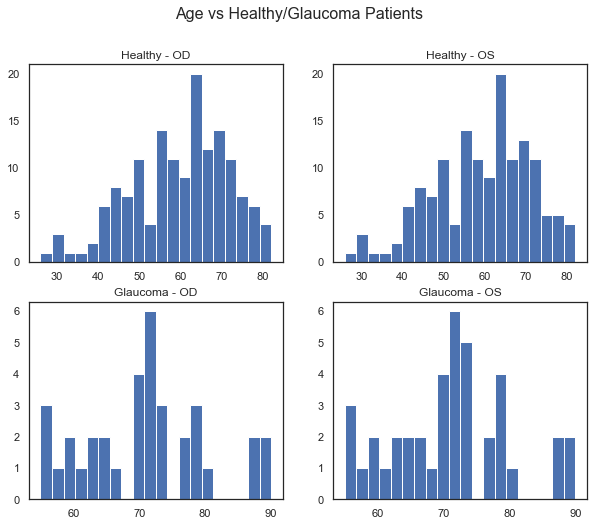

In [838]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Age vs Healthy/Glaucoma Patients', fontsize=16)
axs[0, 0].hist(od_healthy['Age'], bins=20)
axs[0, 0].set_title('Healthy - OD')
axs[0, 1].hist(os_healthy['Age'], bins=20)
axs[0, 1].set_title('Healthy - OS')
axs[1, 0].hist(od_glaucoma['Age'], bins=20)
axs[1, 0].set_title('Glaucoma - OD')
axs[1, 1].hist(os_glaucoma['Age'], bins=20)
axs[1, 1].set_title('Glaucoma - OS')
plt.show()

Plot boxplots of the IOP values for healthy and glaucomatous patients:

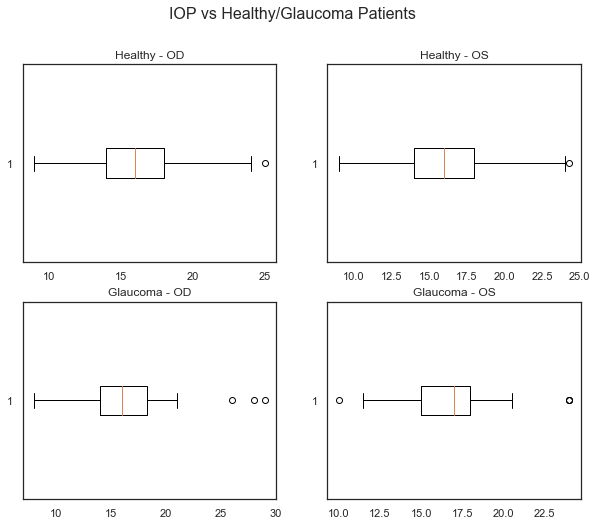

In [839]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('IOP vs Healthy/Glaucoma Patients', fontsize=16)
axs[0, 0].boxplot(od_healthy['IOP'], vert=False)
axs[0, 0].set_title('Healthy - OD')
axs[0, 1].boxplot(os_healthy['IOP'], vert=False)
axs[0, 1].set_title('Healthy - OS')
axs[1, 0].boxplot(od_glaucoma['IOP'], vert=False)
axs[1, 0].set_title('Glaucoma - OD')
axs[1, 1].boxplot(os_glaucoma['IOP'], vert=False)
axs[1, 1].set_title('Glaucoma - OS')
plt.show()

Swarmplots of the VF_MD values for healthy and glaucomatous patients:

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 79.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


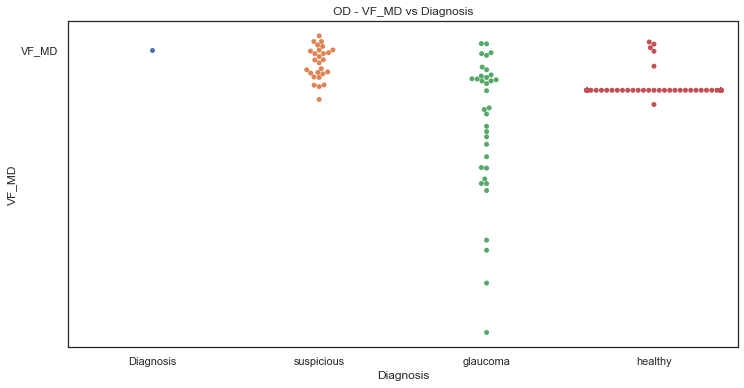

In [840]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the first swarm plot
ax1 = sns.swarmplot(x='Diagnosis', y='VF_MD', data=od_cleaned)
ax1.set_title('OD - VF_MD vs Diagnosis')

# Show the plot
plt.show()

C:\Users\Hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\categorical.py:1296: UserWarning: 81.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


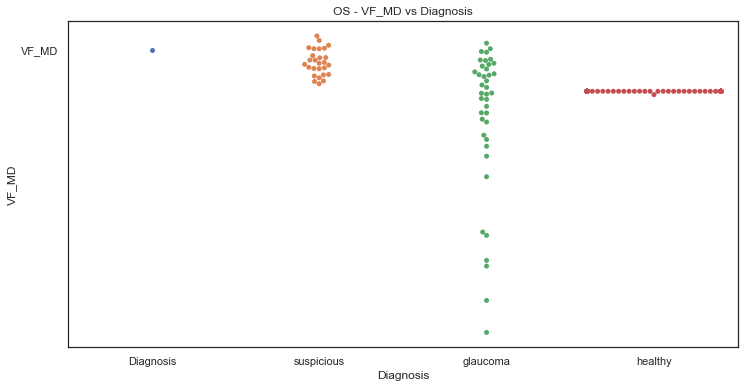

In [841]:

# Set the figure size
plt.figure(figsize=(12, 6))
# Plot the second swarm plot
ax2 = sns.swarmplot(x='Diagnosis', y='VF_MD', data=os_cleaned)
ax2.set_title('OS - VF_MD vs Diagnosis')

# Show the plot
plt.show()

Bar Chart of the Gender distribution for healthy and glaucomatous patients:

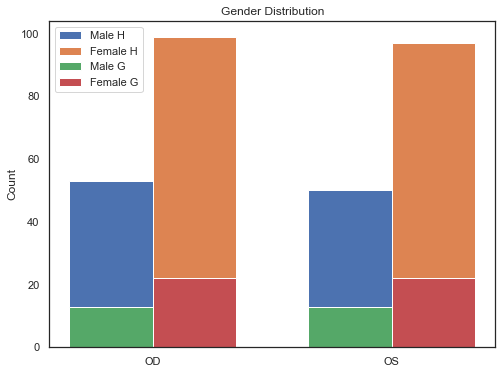

In [849]:
# Calculate the number of male and female patients in each group
od_healthy_gender = od_cleaned[od_cleaned['Diagnosis'] == 'healthy']['Gender'].value_counts()
os_healthy_gender = os_cleaned[os_cleaned['Diagnosis'] == 'healthy']['Gender'].value_counts()
od_glaucoma_gender = od_cleaned[od_cleaned['Diagnosis'] == 'glaucoma']['Gender'].value_counts()
os_glaucoma_gender = os_cleaned[os_cleaned['Diagnosis'] == 'glaucoma']['Gender'].value_counts()

# Create a bar chart to compare the gender distribution between healthy and glaucoma patients
labels = ['OD', 'OS']
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, [od_healthy_gender['M'], os_healthy_gender['M']], width, label='Male H')
rects2 = ax.bar(x + width/2, [od_healthy_gender['F'], os_healthy_gender['F']], width, label='Female H')
rects1 = ax.bar(x - width/2, [od_glaucoma_gender['M'], od_glaucoma_gender['M']], width, label='Male G')
rects2 = ax.bar(x + width/2, [od_glaucoma_gender['F'], od_glaucoma_gender['F']], width, label='Female G')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Gender Distribution')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the chart
plt.show()

Box Plot of the Axial Length vs healthy and glaucomatous patients:

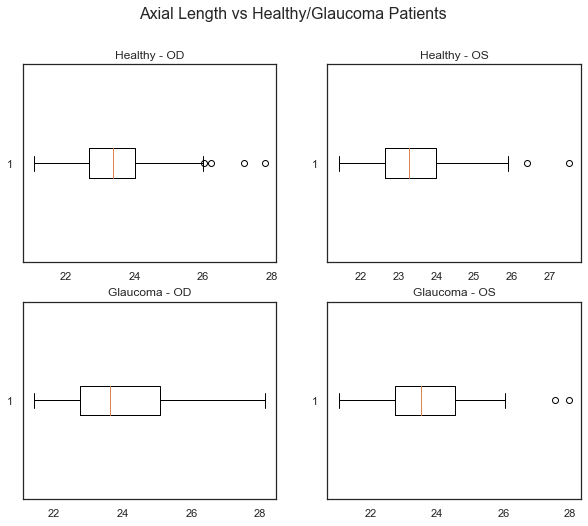

In [843]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Axial Length vs Healthy/Glaucoma Patients', fontsize=16)
axs[0, 0].boxplot(od_healthy['Axial_Length'], vert=False)
axs[0, 0].set_title('Healthy - OD')
axs[0, 1].boxplot(os_healthy['Axial_Length'], vert=False)
axs[0, 1].set_title('Healthy - OS')
axs[1, 0].boxplot(od_glaucoma['Axial_Length'], vert=False)
axs[1, 0].set_title('Glaucoma - OD')
axs[1, 1].boxplot(os_glaucoma['Axial_Length'], vert=False)
axs[1, 1].set_title('Glaucoma - OS')
plt.show()

Swarmplots of the Pachymetry values for healthy and glaucomatous patients:

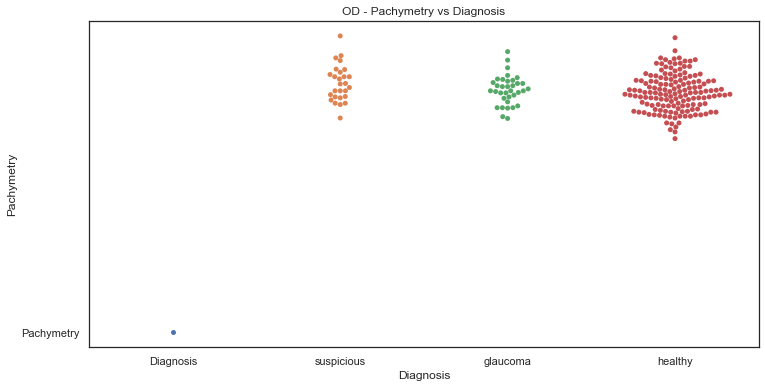

In [845]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the first swarm plot
ax1 = sns.swarmplot(x='Diagnosis', y='Pachymetry', data=od_cleaned)
ax1.set_title('OD - Pachymetry vs Diagnosis')

# Show the plot
plt.show()

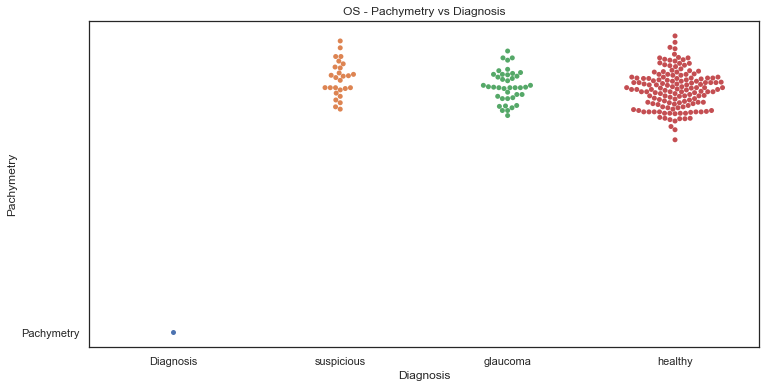

In [846]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the first swarm plot
ax1 = sns.swarmplot(x='Diagnosis', y='Pachymetry', data=os_cleaned)
ax1.set_title('OS - Pachymetry vs Diagnosis')

# Show the plot
plt.show()